In [1]:
%pip install pandas numpy matplotlib

In [2]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:

df=pd.read_csv("datasets/heart_disease_patients.csv")

In [5]:
len(df.columns)

12

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [7]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


In [8]:
df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [9]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
scale=StandardScaler()
scaled_data=scale.fit_transform(df)
scaled_data

array([[-1.72634387,  0.94872647,  0.68620244, ..., -0.69663055,
         1.08733806,  2.27457861],
       [-1.71491113,  1.39200191,  0.68620244, ...,  1.43548113,
         0.39718162,  0.64911323],
       [-1.70347839,  1.39200191,  0.68620244, ...,  1.43548113,
         1.34614673,  0.64911323],
       ...,
       [ 1.70347839,  0.28381332,  0.68620244, ...,  1.43548113,
         0.13837295,  0.64911323],
       [ 1.71491113,  0.28381332, -1.4572959 , ..., -0.69663055,
        -0.89686172,  0.64911323],
       [ 1.72634387, -1.82174501,  0.68620244, ..., -0.69663055,
        -0.89686172, -0.97635214]], shape=(303, 12))

In [13]:
tsne=TSNE(n_components=2,random_state=42,perplexity=30,max_iter=1000)
tsne_components=tsne.fit_transform(scaled_data)

In [14]:
#elbow method

inertia=[]
for k in range(1,13):
    Kmeans=KMeans(n_clusters=k,random_state=42)
    Kmeans.fit(scaled_data)
    inertia.append(Kmeans.inertia_)
inertia

[3636.0,
 3057.16204425228,
 2811.8444604548886,
 2678.564017233354,
 2491.9904076174244,
 2380.1414239928786,
 2311.314415768974,
 2250.7832588690117,
 2162.227194261421,
 2114.5225065340082,
 2065.5548575322973,
 2004.7196174701219]

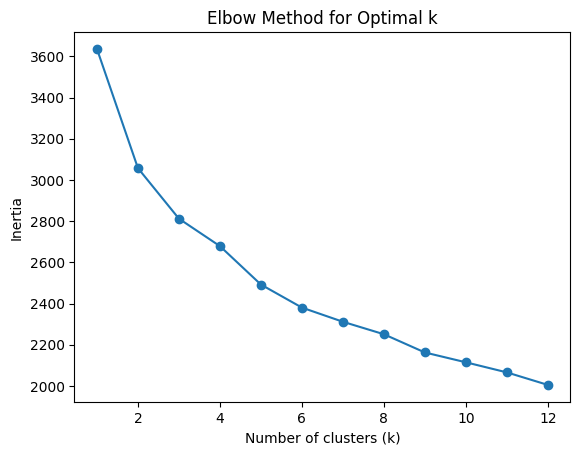

In [15]:
plt.plot(range(1, 13), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k=6 is optimal number of cluster state

In [16]:
kmeans=KMeans(n_clusters=6,random_state=42)
clusters=kmeans.fit_predict(tsne_components)

In [17]:
tsne_df = pd.DataFrame(tsne_components, columns=['tSNE1', 'tSNE2'])

tsne_df['Cluster'] = clusters
tsne_df

,tSNE1,tSNE2,Cluster
0,-11.944972,3.234829,0
1,-4.792879,11.267459,4
2,-4.753644,14.572515,4
3,-10.408963,-5.589338,3
4,6.522137,-2.613056,5
...,...,...,...
298,2.715667,-11.877155,1
299,-10.427791,6.466576,0
300,2.812062,14.927420,4
301,8.666809,-4.161402,5


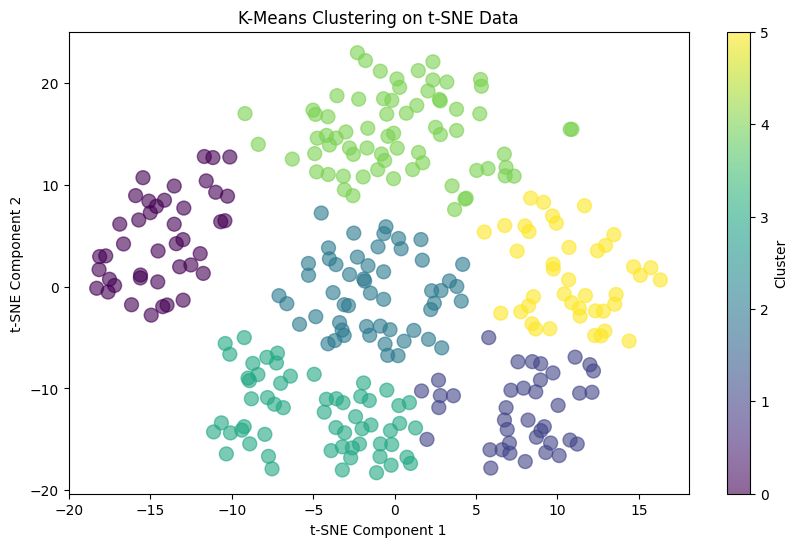

In [18]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    tsne_df['tSNE1'],
    tsne_df['tSNE2'],
    c=tsne_df['Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.6
)
plt.title('K-Means Clustering on t-SNE Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [19]:
df['Cluster']=kmeans.labels_

In [20]:
df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,Cluster
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,4
2,3,67,1,4,120,229,0,2,129,1,2.6,2,4
3,4,37,1,3,130,250,0,0,187,0,3.5,3,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,0
300,301,57,1,4,130,131,0,0,115,1,1.2,2,4
301,302,57,0,2,130,236,0,2,174,0,0.0,2,5


In [26]:
new_input_dict = {
    "id":[1],
    "age": [63],
    "sex": [1],
    "cp": [1],
    "trestbps": [145],
    "chol": [233],
    "fbs": [1],
    "restecg": [2],
    "thalach": [150],
    "exang": [0],
    "oldpeak": [2.3],
    "slope": [3],
}

In [27]:
new_input = pd.DataFrame(new_input_dict)

In [28]:
scaled_new_input = scale.transform(new_input)